## 导入文件
#### 哦吼，AF2直接杀死了比赛，不用比这个了
- sheet_name=1（实际sheet2）

In [1]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=1)

# 取第2-25行数据（即All Alpha proteins数据），同理取其他的
df_allalpha = df.iloc[0:24, :]
df_allbeta = df.iloc[24:48, :]
df_alphabeta = df.iloc[48:72, :]

# 将三个DataFrame合并成一个DataFrame  
df = pd.concat([df_allalpha.assign(label='All alpha'), 
                df_allbeta.assign(label='All beta'), 
                df_alphabeta.assign(label='Alpha + beta')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        759  0.85580         NaN         NaN         NaN         NaN   
1        628  0.98741     0.97902         NaN     0.83727     0.84416   
2        124  0.93075     0.99898         NaN         NaN         NaN   
3        275  0.83440     0.97330         NaN         NaN         NaN   
4        145  0.84228         NaN     0.41233         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM      label  
0         NaN     0.63396     0.55569  All alpha  
1         NaN         NaN         NaN  All alpha  
2         NaN         NaN         NaN  All alpha  
3         NaN         NaN         NaN  All alpha  
4     0.71275         NaN     0.35696  All alpha  
样本总量为:  72


### 【反向思考】
##### 单独提取af>0.5的部分，看优点
##### 同理af<0.5，看风险

> ['AF-TM'] < 0.5 或者 ['AF-TM'] > 0.5

In [4]:
# Filter rows where the value of the 'AF-RMSD' column is MORE than 0.5
df_filtered = df[df['AF-TM'] > 0.5]

# 输出前5行数据
print(df_filtered.head(10))


   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        759  0.85580         NaN         NaN         NaN         NaN   
1        628  0.98741     0.97902         NaN     0.83727     0.84416   
2        124  0.93075     0.99898         NaN         NaN         NaN   
3        275  0.83440     0.97330         NaN         NaN         NaN   
4        145  0.84228         NaN     0.41233         NaN         NaN   
5        511  0.99185         NaN     0.91435     0.93838         NaN   
6        505  0.86451         NaN     0.98360         NaN         NaN   
7        110  0.56277         NaN     0.58441         NaN         NaN   
8        250  0.73535         NaN     0.93407         NaN         NaN   
9        733  0.93685     0.99930         NaN         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM      label  
0         NaN     0.63396     0.55569  All alpha  
1         NaN         NaN         NaN  All alpha  
2         NaN         NaN         NaN  All 

### 输出af结果

样本总量为:  72


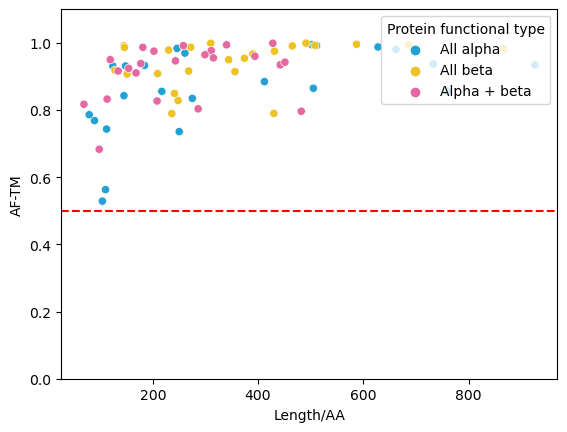

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# result=result3

sns.scatterplot(x='Length/AA', y='AF-TM', hue='label', data=df_filtered, palette={'All alpha': '#24a1d3', 'All beta': '#ecc225', 'Alpha + beta': '#e469a2'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='upper right', title='Protein functional type')

# 计算'Length/AA'列的样本总量并输出结果
count = df_filtered['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

### 输出sm结果
> 选个SM

In [7]:
# SM='1.0-0.9-TM'
# SM='0.9-0.8-TM'
# SM='0.8-0.7-TM'
# SM='0.7-0.6-TM'
# SM='0.6-0.5-TM'
# SM='0.5-0.4-TM'
SM='0.4-0.3-TM'

样本总量为:  72


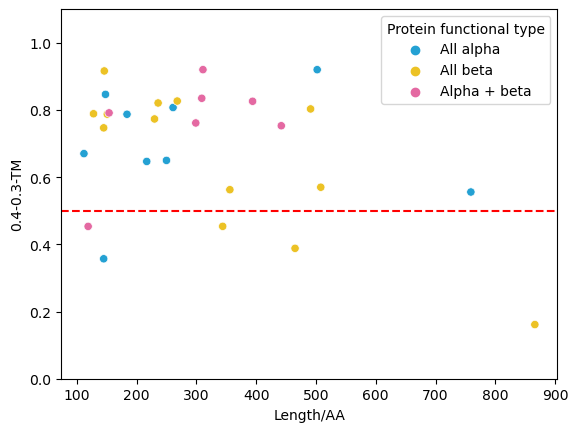

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y=SM, hue='label', data=df_filtered, palette={'All alpha': '#24a1d3', 'All beta': '#ecc225', 'Alpha + beta': '#e469a2'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='best', title='Protein functional type')

# 计算'Length/AA'列的样本总量并输出结果
count = df_filtered['Length/AA'].count()
print("样本总量为: ", count)

plt.show()
## 换个思路
### af内部看蜂窝图试试

## 换个思路
#### af内部蜂窝图比比看

In [3]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=1)

# 取第2-25行数据（即All Alpha proteins数据），同理取其他的
df_allalpha = df.iloc[0:24, :]
df_allbeta = df.iloc[24:48, :]
df_alphabeta = df.iloc[48:72, :]

# 将三个DataFrame合并成一个DataFrame  
df = pd.concat([df_allalpha.assign(label='All alpha'), 
                df_allbeta.assign(label='All beta'), 
                df_alphabeta.assign(label='Alpha + beta')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        759  0.85580         NaN         NaN         NaN         NaN   
1        628  0.98741     0.97902         NaN     0.83727     0.84416   
2        124  0.93075     0.99898         NaN         NaN         NaN   
3        275  0.83440     0.97330         NaN         NaN         NaN   
4        145  0.84228         NaN     0.41233         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM      label  
0         NaN     0.63396     0.55569  All alpha  
1         NaN         NaN         NaN  All alpha  
2         NaN         NaN         NaN  All alpha  
3         NaN         NaN         NaN  All alpha  
4     0.71275         NaN     0.35696  All alpha  
样本总量为:  72


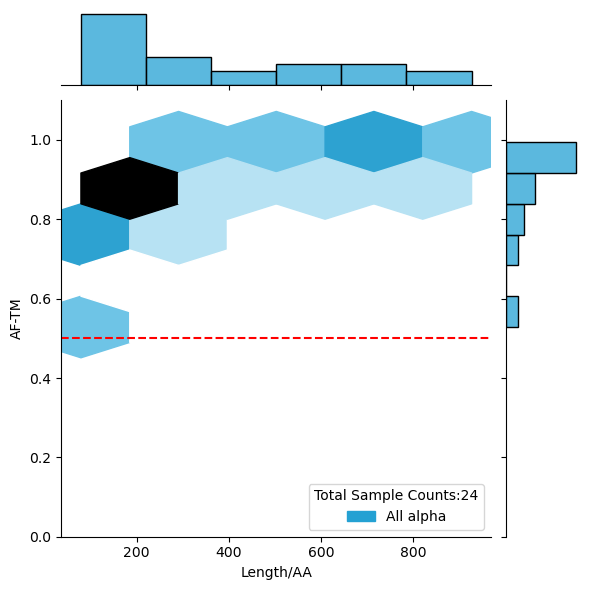

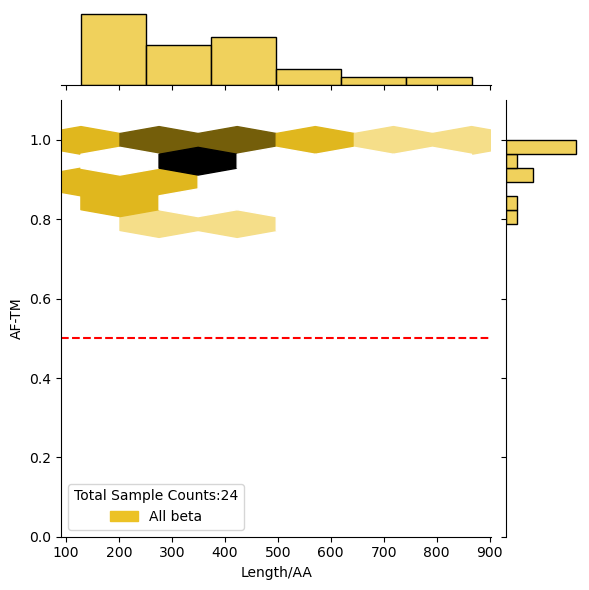

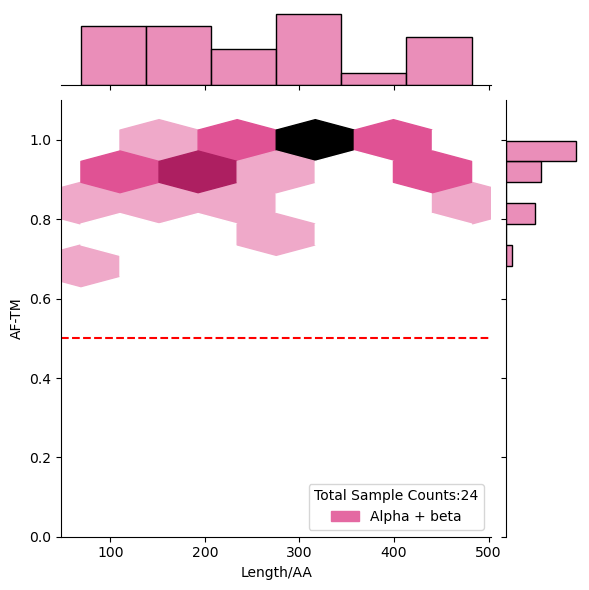

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制散点图附带直方图
sns.jointplot(x='Length/AA',y='AF-TM',data=df_allalpha,kind="hex", label='All alpha', color='#24a1d3', ylim=(0, 1.1))
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_allalpha['AF-TM'].count()), loc='lower right')
# 更改图例方块的颜色
for handle in leg.legendHandles:
    handle.set_color('#24a1d3')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_allbeta,kind="hex", label='All beta', color='#ecc225', ylim=(0, 1.1))
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_allbeta['AF-TM'].count()), loc='lower left')
for handle in leg.legendHandles:
    handle.set_color('#ecc225')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_alphabeta,kind="hex", label='Alpha + beta', color='#e469a2', ylim=(0, 1.1))
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_alphabeta['AF-TM'].count()), loc='lower right')
for handle in leg.legendHandles:
    handle.set_color('#e469a2')

plt.show()